In [158]:
#imports
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
train = pd.read_excel('/Users/ilyamikheev/Downloads/ages.xlsx', header=1)

In [152]:
Data = pd.read_excel('/Users/ilyamikheev/Downloads/ages.xlsx', header=1)

In [215]:
train

,ID,AGE,COND,P1_AMP,N1_AMP,P2_AMP,N2_AMP,P1_LAT,P2_LAT,N1_LAT,N2_LAT,N1P2,OLD
0,7,5.04,50,2.032863,6.294144,6.375147,0.685769,88.0,130.0,90.0,240.0,0.081003,A
1,7,5.04,60,-0.178670,0.795800,0.054853,-1.543763,86.0,128.0,108.0,298.0,0.740947,A
2,7,5.04,70,5.612161,5.584804,-0.137635,-3.187512,66.0,120.0,138.0,274.0,5.722439,A
3,7,5.04,80,1.865363,0.998076,-1.061847,-4.500305,78.0,120.0,138.0,288.0,2.059923,A
4,9,5.86,50,-0.316512,0.070554,-2.186760,-5.512636,88.0,120.0,138.0,296.0,2.257314,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,57,13.99,80,0.247360,-5.280674,-4.595989,-7.299122,34.0,156.0,116.0,212.0,0.684685,C
124,68,16.94,50,0.869114,-1.164237,0.780845,-3.950002,74.0,146.0,106.0,254.0,1.945081,C
125,68,16.94,60,0.823551,-1.307943,0.640693,-4.524477,72.0,140.0,98.0,276.0,1.948636,C
126,68,16.94,70,0.181129,-2.033837,2.453336,-2.590944,46.0,144.0,96.0,298.0,4.487173,C


In [163]:

from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['ID', 'AGE', 'COND', 'N1P2', 'OLD', 'P1_AMP', 'N1_AMP', 'P2_AMP', 'N2_AMP']), train['OLD'], test_size=0.2, random_state=42)
print(X_test.shape)
lgb = LGBMClassifier(objective='multiclass')
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
le.fit(y_train)
y_train = le.transform(y_train)
lgb.fit(X_train, y_train)
y_test.to_list()
tr = le.transform(y_test)
predictions = lgb.predict_proba(X_test)
predictions_t = lgb.predict(X_test)
#print(accuracy_score(tr, predictionredictions_ts_t.reshape(-1,1)))
print(precision_score(tr, predictions_t.reshape(-1,1), average='macro') )

(26, 4)
0.38425925925925924


In [117]:

from matplotlib import pyplot as plt, cm
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, minmax_scale

In [183]:
def predict_lm(data):
    """
    function for logistic regression model
    Parameters
    ----------
    data: list[np.ndarray]
    eeg_param: list[dict, list]
       [fr_bands, channels_names]

    Returns
    -------
    :rtype: tuple
    :return: ac, roc_auc, interp_tpr, coefs
    """
    mean_fpr = np.linspace(0, 1, 100)
    coefs = np.zeros((2, 4))
    model = make_pipeline(StandardScaler(), LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))), penalty='l2',
                                                           scoring='accuracy', random_state=0, max_iter=10000,
                                                           fit_intercept=True,multi_class='multinomial', solver='newton-cg',
                                                           class_weight='balanced', tol=10))
    model.fit(data[0], data[2])
    y_predict, y_predict_pr = model.predict(data[1]), model.predict_proba(data[1])
    ac = balanced_accuracy_score(data[3], y_predict)
    cm = confusion_matrix(data[3], y_predict)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return ac, y_predict_pr, model, cm.diagonal()


In [230]:
cm.diagonal()

AttributeError: module 'matplotlib.cm' has no attribute 'diagonal'

In [142]:
model = make_pipeline(StandardScaler(),
                          (LogisticRegression(multi_class='multinomial', solver='lbfgs')))
#model.fit(data[0], data[2])

In [184]:

X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['ID', 'AGE', 'COND', 'N1P2', 'OLD']), train['OLD'], test_size=0.2, random_state=42)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
tr = le.transform(y_test)
ac, y_predict_pr, model, ac_all = predict_lm([X_train, X_test, y_train, tr])

In [231]:
ac_all

array([0.71428571, 0.45454545, 0.75      ])

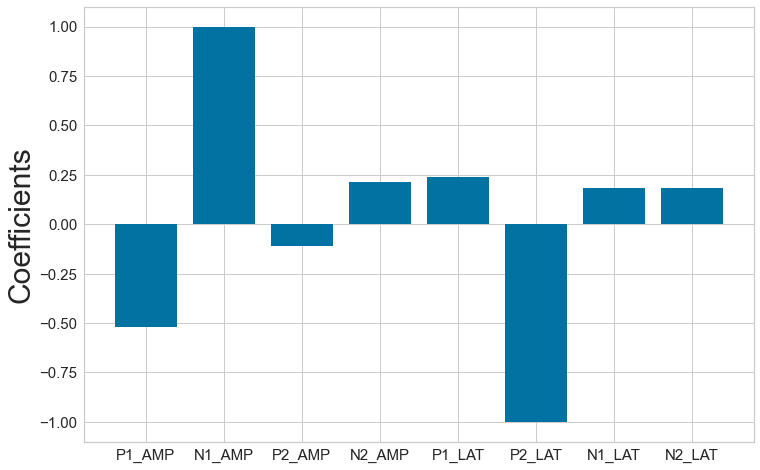

In [223]:
importance = minmax_scale(model[1].coef_[0], feature_range=(-1, 1))
# summarize feature importance
s = [1,2,3,4,5,6,7,8]
objects = ['P1_AMP', 'N1_AMP', 'P2_AMP', 'N2_AMP', 'P1_LAT', 'P2_LAT', 'N1_LAT', 'N2_LAT']
fig, axes = plt.subplots(figsize=(12, 8))
axes.bar([x for x in range(len(importance))], importance)
axes.set_ylabel('Coefficients', fontsize=30)
axes.tick_params(axis='both', labelsize=15)
plt.xticks([x for x in range(len(importance))], objects)
plt.show()


In [225]:
fig.savefig(os.path.join('/Users/ilyamikheev/Downloads/coefs_all.png'), format='png', bbox_inches='tight', dpi=300)

In [185]:
ac

0.6396103896103896

In [ ]:
0.714286

In [186]:
ac_all

array([0.71428571, 0.45454545, 0.75      ])

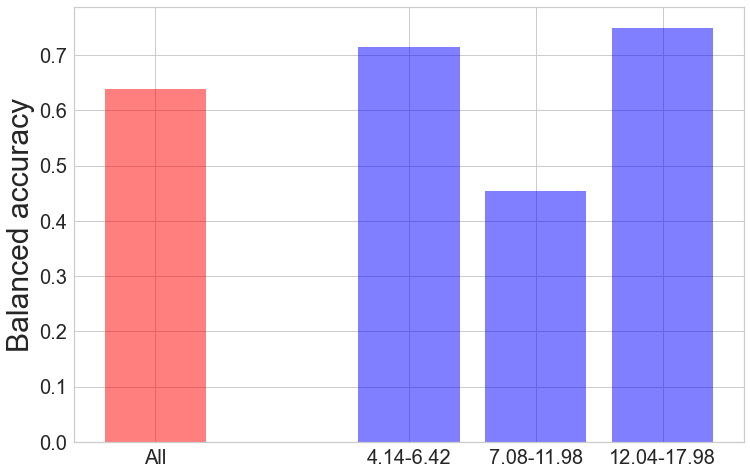

In [228]:
objects = ('All', '4.14-6.42', '7.08-11.98', '12.04-17.98')
x = [1,3,4,5]
performance = [ac, 0.714286, 0.454545, 0.750000]
fig, axes = plt.subplots(figsize=(12, 8))
axes.bar(x, performance, align='center', alpha=0.5, color=['red', 'blue', 'blue', 'blue'])
plt.xticks(x, objects)
axes.set_ylabel('Balanced accuracy', fontsize=30)
axes.tick_params(axis='both', labelsize=20)
plt.title("")
plt.show()

In [229]:
fig.savefig(os.path.join('/Users/ilyamikheev/Downloads/ac_all.png'), format='png', bbox_inches='tight', dpi=300)

In [110]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [ ]:
from sklearn.metrics import balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    train.drop(columns=['ID', 'AGE', 'COND', 'N1P2', 'OLD', 'P1_LAT', 'P2_LAT', 'N1_LAT', 'N2_LAT']), train['OLD'],
    test_size=0.2, random_state=42)
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
le.fit(y_train)
y_train = le.transform(y_train)
tr = le.transform(y_test)
ac, roc_auc, interp_tpr, coef_ev, y_predict_pr = predict_lm([X_train, X_test, y_train, tr])

In [106]:
y_train

array([1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 2, 2,
       1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2])

In [101]:
X_train

array([[ 6.30205991e-01,  2.07011124e+00,  2.09811492e+00,
         4.68067470e-01],
       [-8.14666508e-01, -7.74712906e-01, -6.56933329e-01,
        -3.03832916e-01],
       [ 7.04304323e-01,  1.65370096e+00,  1.69184871e+00,
        -1.14617930e+00],
       [ 4.14426449e-01,  1.59759152e+00,  1.63282684e+00,
         1.38485530e+00],
       [-1.82631768e-01,  2.67541433e-01, -3.37999166e-01,
        -2.25482573e+00],
       [ 1.29800974e+00, -4.85744062e-01, -1.01614409e+00,
        -4.13431571e-01],
       [-7.25866800e-01, -1.09477308e+00,  3.60747965e-01,
         5.44932377e-01],
       [-7.11477315e-02,  1.50541475e+00,  1.84714930e+00,
         2.57066903e+00],
       [-7.28201139e-01, -9.55594870e-01, -1.54133336e+00,
        -1.57782435e+00],
       [-2.17786516e+00, -2.54926905e+00, -2.63579920e+00,
         1.71899840e-01],
       [ 1.18315828e-01,  7.68347781e-01,  5.64638702e-01,
        -1.19804355e+00],
       [ 9.12972084e-01,  1.61525205e+00,  4.34983163e-01,
      

In [68]:
predictions_t.reshape(-1,1)

array([[1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [1]])

In [69]:
tr

array([1, 1, 0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 1])

In [59]:
X_train

array([[ 6.30205991e-01,  2.07011124e+00,  2.09811492e+00,
         4.68067470e-01],
       [-8.14666508e-01, -7.74712906e-01, -6.56933329e-01,
        -3.03832916e-01],
       [ 7.04304323e-01,  1.65370096e+00,  1.69184871e+00,
        -1.14617930e+00],
       [ 4.14426449e-01,  1.59759152e+00,  1.63282684e+00,
         1.38485530e+00],
       [-1.82631768e-01,  2.67541433e-01, -3.37999166e-01,
        -2.25482573e+00],
       [ 1.29800974e+00, -4.85744062e-01, -1.01614409e+00,
        -4.13431571e-01],
       [-7.25866800e-01, -1.09477308e+00,  3.60747965e-01,
         5.44932377e-01],
       [-7.11477315e-02,  1.50541475e+00,  1.84714930e+00,
         2.57066903e+00],
       [-7.28201139e-01, -9.55594870e-01, -1.54133336e+00,
        -1.57782435e+00],
       [-2.17786516e+00, -2.54926905e+00, -2.63579920e+00,
         1.71899840e-01],
       [ 1.18315828e-01,  7.68347781e-01,  5.64638702e-01,
        -1.19804355e+00],
       [ 9.12972084e-01,  1.61525205e+00,  4.34983163e-01,
      

In [55]:
X_train.shape

(102, 4)

In [37]:
type(y_test)

pandas.core.series.Series

In [25]:
predictions_t

array([1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 0, 0, 1])

In [24]:
y_test

55     B
40     B
19     A
31     B
98     C
56     B
69     B
104    C
81     B
26     A
94     C
27     A
64     B
4      A
96     C
113    C
36     B
80     B
125    C
84     B
18     A
10     A
118    C
11     A
105    C
45     B
Name: OLD, dtype: object

In [4]:
from lightgbm import LGBMClassifier
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['ID', 'AGE', 'COND', 'N1P2', 'OLD', 'P1_LAT', 'P2_LAT', 'N1_LAT', 'N2_LAT']), train['OLD'], test_size=0.2, random_state=42)
lgb = LGBMClassifier(objective='multiclass')

In [5]:
model = lgb

In [ ]:
import lightgbm
lightgbm.plot_importance(lgb, max_num_features=50, figsize=(16,9))
#plt.savefig('imp_amp.png')

In [ ]:
import pandas
from scipy.stats import mstats

Data = pandas.read_csv("/Users/ilyamikheev/Downloads/ages_td.csv")

In [159]:
import numpy as np
c_names = ['P1_AMP', 'N1_AMP', 'P2_AMP', 'N2_AMP', 'P1_LAT', 'P2_LAT', 'N1_LAT', 'N2_LAT']
m_v = np.zeros([8,6])
res = np.zeros([8,2])
for i, name in enumerate(c_names):
    Col_1 = Data[Data['OLD']=='A'][name]
    Col_2 = Data[Data['OLD']=='B'][name]
    Col_3 = Data[Data['OLD']=='C'][name]
    m_v[i,0], m_v[i,1], m_v[i,2], m_v[i,3], m_v[i,4], m_v[i,5] = Col_1.median(), Col_2.median(), Col_3.median(), Col_1.std(), Col_2.std(), Col_3.std()
    res[i,0], res[i,1] = mstats.kruskalwallis(Col_1.values, Col_2.values, Col_3.values)

In [160]:
res

array([[1.92295351e+01, 6.67358984e-05],
       [3.05387372e+01, 2.33667052e-07],
       [2.94904342e+00, 2.28888176e-01],
       [1.94602184e+01, 5.94657988e-05],
       [2.27627372e+01, 1.14060277e-05],
       [1.19209087e+01, 2.57874001e-03],
       [4.46707317e-01, 7.99831932e-01],
       [2.59838161e+00, 2.72752414e-01]])

In [226]:
m_v

array([[  0.81865667,   1.98849771,   0.8173958 ,   1.62997602,
          1.63388228,   1.01129615],
       [  1.87945339,   2.28462016,  -0.33217261,   2.79735027,
          2.92093582,   2.37199765],
       [  0.65673358,   1.74607287,   1.27999878,   3.08862113,
          3.0351811 ,   2.95291114],
       [ -2.81898136,  -5.70299342,  -2.91507759,   5.20777193,
          3.31216358,   2.69260754],
       [ 88.        ,  80.        ,  70.        ,  19.87314265,
         14.22689404,  18.82475574],
       [128.        , 133.        , 156.        ,  18.87861532,
         21.58449965,  17.63429199],
       [114.        , 113.        , 114.        ,  20.04264633,
         17.29563208,  13.73582964],
       [270.        , 262.        , 255.        ,  26.81052466,
         20.0850313 ,  29.94280262]])

In [146]:
model.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [174]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: '4.14-6.42',
                                        1: '7.08-11.98',
                                        2: '12.04-17.98'})

    # Fitting to the training data first then scoring with the test data
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show('/Users/ilyamikheev/Downloads/roc_auc_age.png', dpi=300)
    return visualizer

In [179]:
from yellowbrick.classifier import PrecisionRecallCurve

/Users/ilyamikheev/.conda/envs/ihna_project/lib/python3.9/site-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


PrecisionRecallCurve(ax=<AxesSubplot:>, cmap='Set1',
                     encoder={0: '4.14-6.42', 1: '7.08-11.98',
                              2: '12.04-17.98'},
                     estimator=OneVsRestClassifier(estimator=Pipeline(steps=[('standardscaler',
                                                                              StandardScaler()),
                                                                             ('logisticregressioncv',
                                                                              LogisticRegressionCV(Cs=[1e-10,
                                                                                                       1e-09,
                                                                                                       1e-08,
                                                                                                       1e-07,
                                                                                                       1e-06,
                                                                                                       1e-05,
                                                                                                       0.0001,
                                                                                                       0.001,
                                                                                                       0.01,
                                                                                                       0.1,
                                                                                                       1.0,
                                                                                                       10.0,
                                                                                                       100.0,
                                                                                                       1000.0,
                                                                                                       10000.0,
                                                                                                       100000.0,
                                                                                                       1000000.0,
                                                                                                       10000000.0,
                                                                                                       100000000.0,
                                                                                                       1000000000.0],
                                                                                                   class_weight='balanced',
                                                                                                   max_iter=10000,
                                                                                                   multi_class='multinomial',
                                                                                                   random_state=0,
                                                                                                   scoring='accuracy',
                                                                                                   solver='newton-cg',
                                                                                                   tol=10))])),
                     iso_f1_values={0.2, 0.4, 0.6, 0.8}, per_class=True)

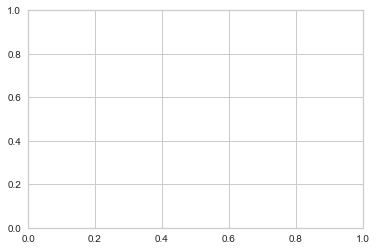

In [182]:
viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1",
    encoder={0: '4.14-6.42',
             1: '7.08-11.98',
            2: '12.04-17.98'})
viz.fit(X_train, y_train)

In [18]:
fig.

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<Figure size 432x288 with 0 Axes>

In [8]:
X_train.shape

(102, 4)

In [ ]:
X_test

/Users/ilyamikheev/.conda/envs/ihna_project/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


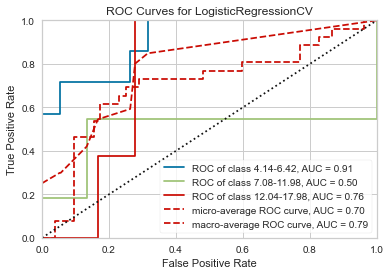

In [178]:
fig = plot_ROC_curve(model, X_train,  y_train, X_test, y_test)

In [15]:
fig.savefig(os.path.join('/Users/ilyamikheev/Downloads/', 'roc_auc_age.png'), format='png', bbox_inches='tight', dpi=600)

AttributeError: 'LGBMClassifier' object has no attribute 'savefig'

In [ ]:
import os
df_subj = pd.DataFrame(res, columns=['H','p_value'], index=c_names)
writer = pd.ExcelWriter(os.path.join('/Users/ilyamikheev/Downloads', 'stat_amp_lat.xlsx'))
df_subj.to_excel(writer)
writer.save()

In [ ]:
import os
df_subj = pd.DataFrame(m_v, columns=['A_median','B_median','C_median','A_std','B_std','C_std'], index=c_names)
writer = pd.ExcelWriter(os.path.join('/Users/ilyamikheev/Downloads', 'median_std_amp_lat.xlsx'))
df_subj.to_excel(writer)
writer.save()